In [8]:
import os
import scanpy as sc
import numpy as np
import torch
from rich import print
import seaborn as sns
import matplotlib.pyplot as plt
import multiprocessing
from timeit import default_timer as timer

from scBTF import SingleCellTensor, SingleCellBTF, FactorizationSet

***
***

## Setup Config and Paths

***
***

In [3]:
sns.set_theme(style="ticks", rc={"axes.facecolor": (0, 0, 0, 0)}, font_scale=1)

In [4]:
sc.set_figure_params(dpi=100, frameon=False, color_map='Reds')
sc.logging.print_header()
sc.settings.njobs = 32

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.9.3 pandas==1.5.2 scikit-learn==1.2.0 statsmodels==0.13.5 python-igraph==0.10.2 pynndescent==0.5.8


In [5]:
DATA_FOLDER = "./chl_analysis/data/"
RESULTS_FOLDER = "./chl_analysis/results/"
FIGURES_FOLDER = "./chl_analysis/figures/"

***
***

## Pseudobulk and Tensorize single nucleus data

***
***

In [6]:
adata = sc.read(os.path.join(DATA_FOLDER, "combined_dataset_final_v2.h5ad"))
print(adata.shape)

(308403, 29786)

In [11]:
sample_label = "donor"
celltype_label = "cell_types_level_3"

sc_tensor = SingleCellTensor.from_anndata(adata,
    sample_label=sample_label,
    celltype_label=celltype_label,
    enrich_db_genes_only=True,
    # filter_gene_count = 100, # TODO
    normalize=True

)
sc_tensor.tensor = sc_tensor.tensor.round()
print(f"Tensor shape :  {sc_tensor.tensor.shape} ")

Building tensor from matrix: 100%|██████████| 15/15 [00:02<00:00,  7.47it/s]


Tensor shape :  (15, 15, 13226)

***
***
## Run scBTF and save factor sets
***
***

In [7]:
factorization_set = SingleCellBTF.factorize(
        sc_tensor = sc_tensor,
        rank = [4,6],
        model = 'gamma_poisson',
        n_restarts = 4,
        num_steps = 1500,
        init_alpha = 1e2,
        plot_var_explained = True
    )

Decomposing tensor of shape torch.Size([15, 15, 13734]) into rank 4 matrices
Decomposing tensor of shape torch.Size([15, 15, 13734]) into rank 6 matrices


Decomposing tensor of shape torch.Size([15, 15, 13734]) into rank 6 matrices restart 0

Decomposing tensor of shape torch.Size([15, 15, 13734]) into rank 4 matrices restart 0

Decomposing tensor of shape torch.Size([15, 15, 13734]) into rank 4 matrices restart 1

Decomposing tensor of shape torch.Size([15, 15, 13734]) into rank 4 matrices restart 2

Decomposing tensor of shape torch.Size([15, 15, 13734]) into rank 6 matrices restart 1

Decomposing tensor of shape torch.Size([15, 15, 13734]) into rank 4 matrices restart 3

Decomposing tensor of shape torch.Size([15, 15, 13734]) into rank 6 matrices restart 2

Decomposing tensor of shape torch.Size([15, 15, 13734]) into rank 6 matrices restart 3



In [5]:
if not os.path.exists(os.path.join(RESULTS_FOLDER, "sn_factorization.pkl")):
    factorization_set = SingleCellBTF.factorize(
        sc_tensor = sc_tensor,
        rank = [20],
        model = 'gamma_poisson',
        n_restarts = 20,
        num_steps = 1500,
        init_alpha = 1e2,
        plot_var_explained = False
    )
    factorization_set.save(os.path.join(RESULTS_FOLDER, "sn_factorization.pkl"))
else:
    factorization_set = FactorizationSet.load(os.path.join(RESULTS_FOLDER, "sn_factorization.pkl"))
factorization_set

Single cell factorization object with the following params:
        Tensor size 15 x 15 x 13941
        Ranks: [12, 16, 20, 24, 28]

***
***
## Assess factorization quality and select rank
***
***

In [6]:

for rank in factorization_set.get_ranks():
    factorization_set.factorizations[rank] = {i: factorization_set.factorizations[rank][i] for i in [0,1,2,3,4] }

Building gene level consensus matrix for rank 12Building gene level consensus matrix for rank 16

Building gene level consensus matrix for rank 20
Building gene level consensus matrix for rank 24
Building gene level consensus matrix for rank 28
Constructed/retreived gene_consensus_lax matrices


/usr/local/anaconda3/envs/minim_pyro/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/anaconda3/envs/minim_pyro/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/anaconda3/envs/minim_pyro/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/anaconda3/envs/minim_pyro/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


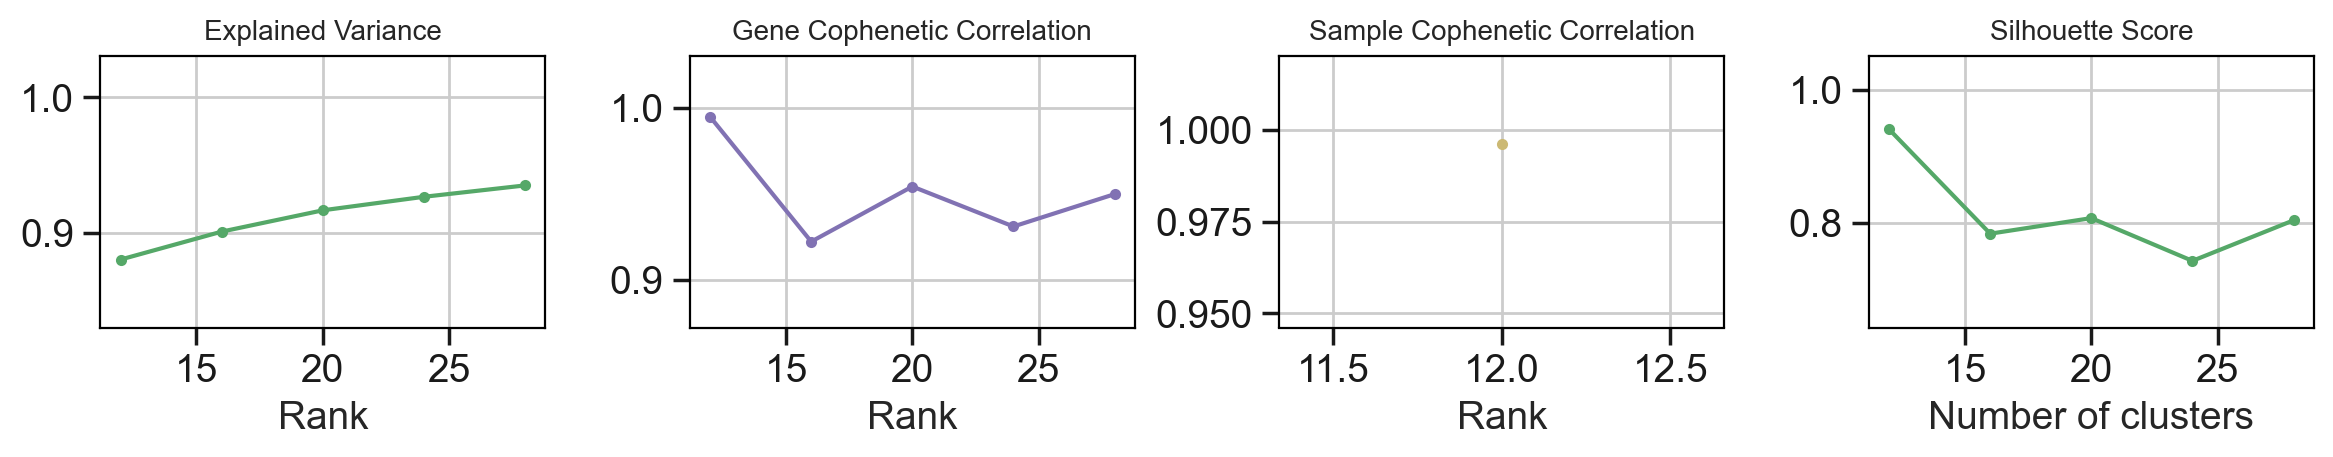

In [7]:

fig = factorization_set.rank_metrics_plot(max_parallel_threads=multiprocessing.cpu_count())

Building gene level consensus matrix for rank 12Building gene level consensus matrix for rank 16

Building gene level consensus matrix for rank 20
Building gene level consensus matrix for rank 24
Building gene level consensus matrix for rank 28
Constructed/retreived gene_consensus_low_thresh matrices


/usr/local/anaconda3/envs/minim_pyro/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/anaconda3/envs/minim_pyro/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/anaconda3/envs/minim_pyro/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/anaconda3/envs/minim_pyro/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


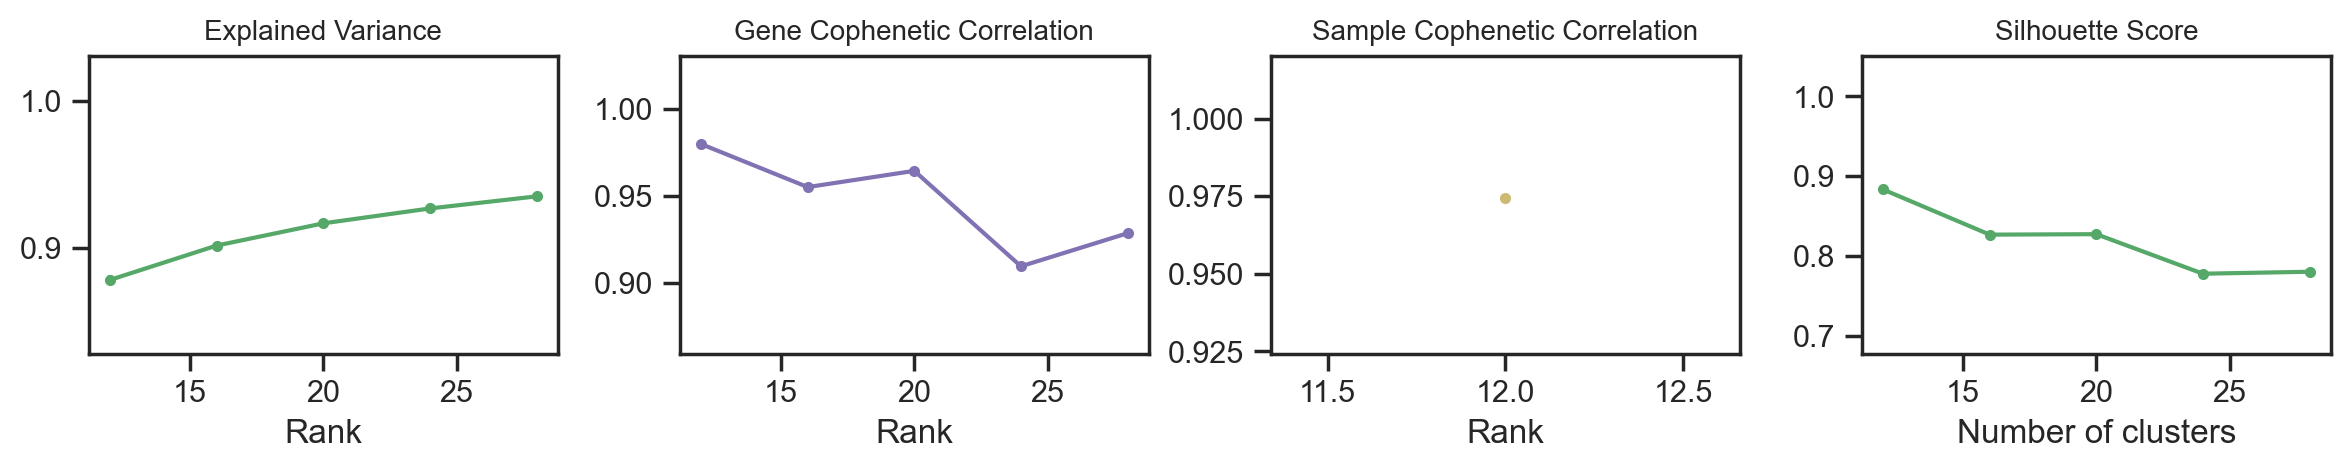

In [11]:
_ = factorization_set.rank_metrics_plot()

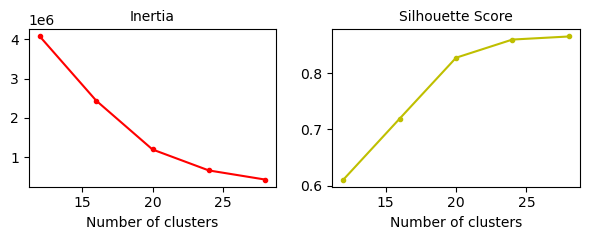

In [60]:
_ = factorization_set.plot_gene_factor_cluster_metrics_per_rank(rank=20)

Building gene level consensus matrix for rank 12
Building gene level consensus matrix for rank 16
Building gene level consensus matrix for rank 20
Building gene level consensus matrix for rank 24
Building gene level consensus matrix for rank 28


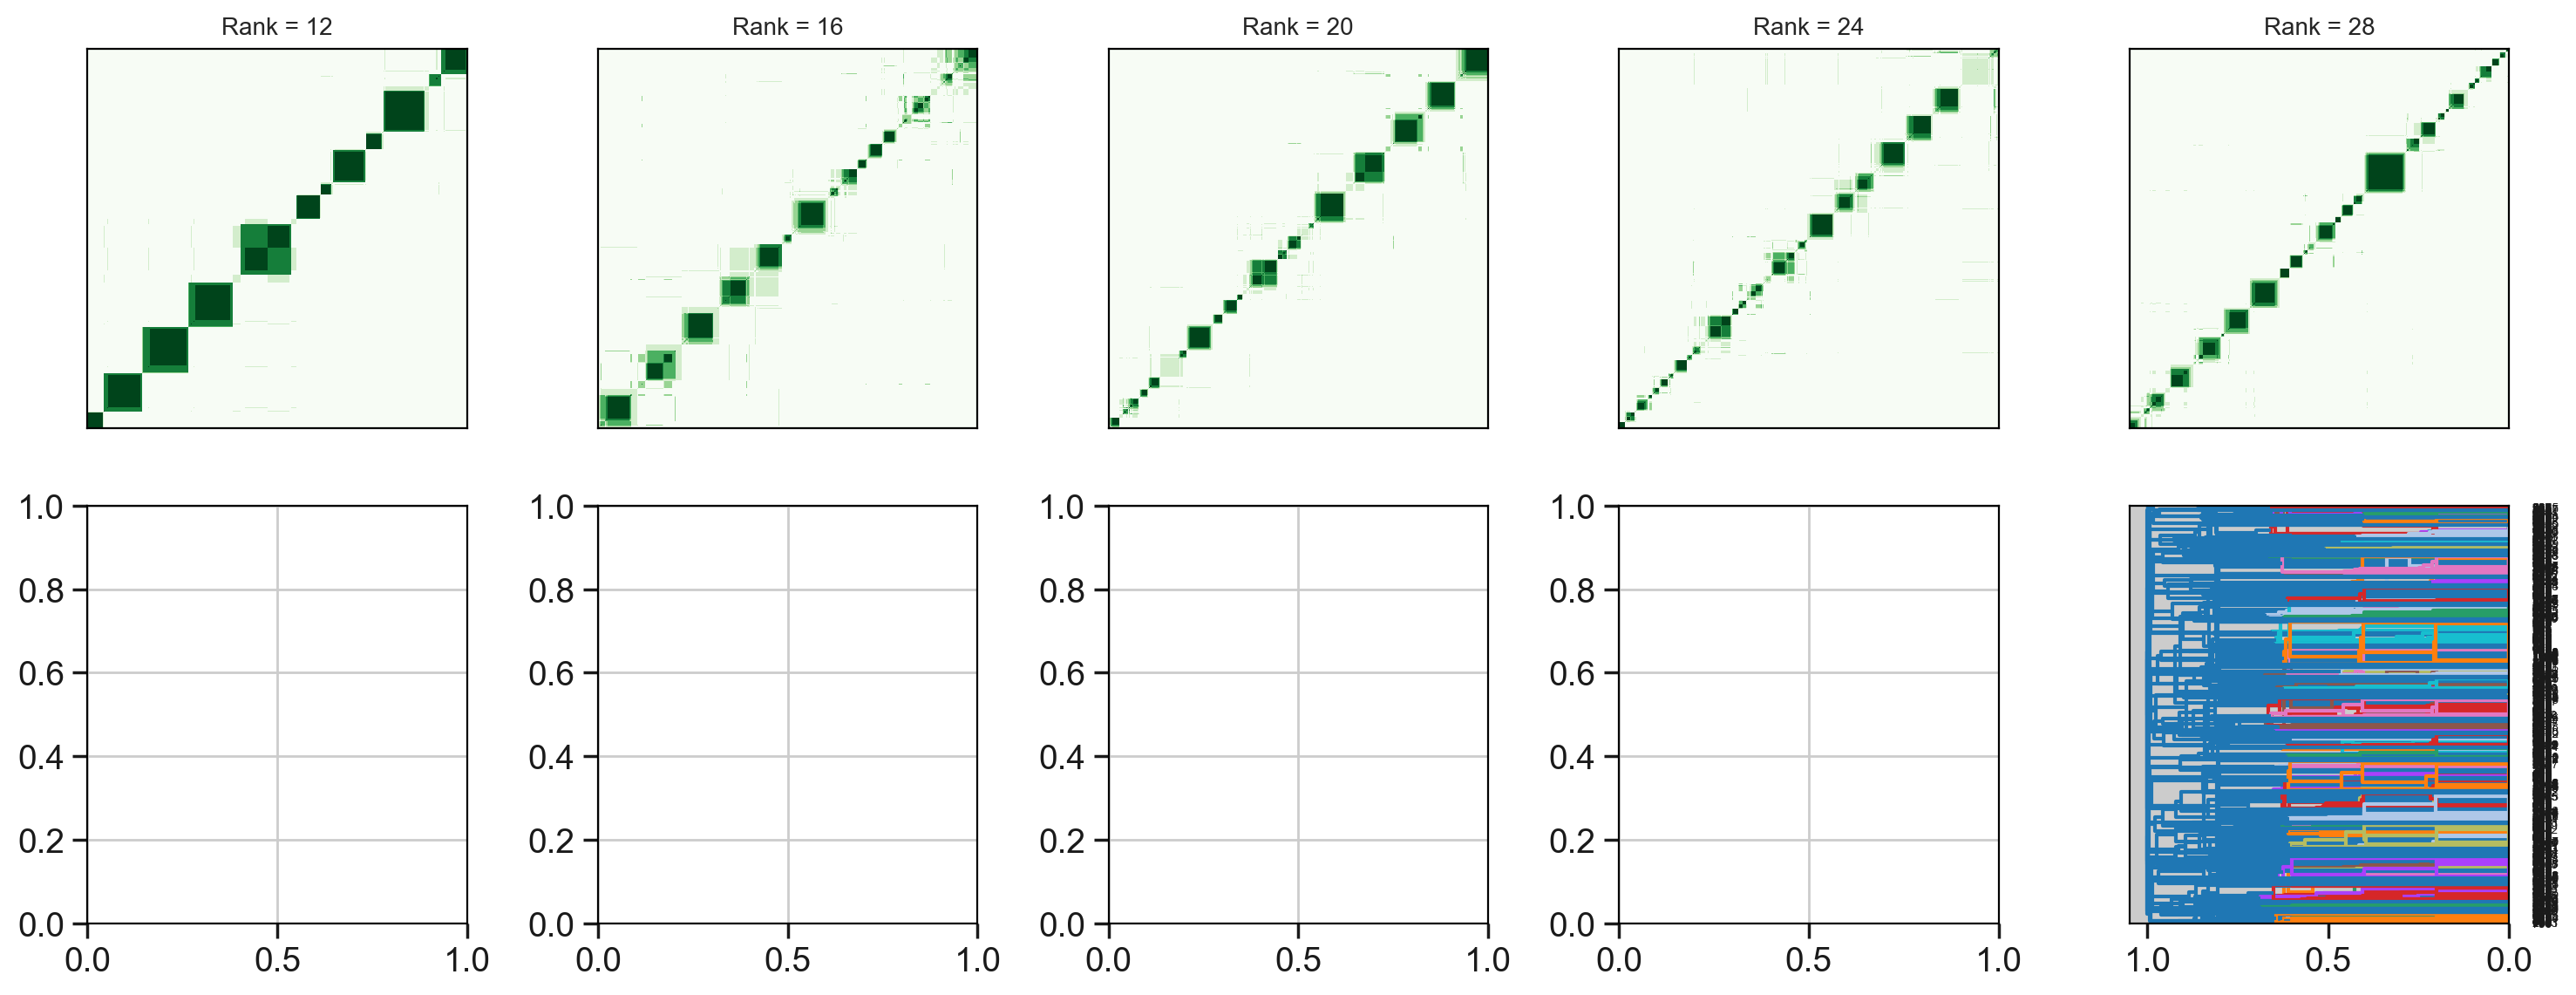

In [8]:
factorization_set.gene_consensus_matrix_plots()

***
*** 
## Generate consensus factorization using median of restart factors
***
***

In [9]:
if not os.path.exists(os.path.join(RESULTS_FOLDER, "sn_bayesian_consensus_factorization.pkl")):
    reconstructed_all = FactorizationSet()
    reconstructed_all.sc_tensor = factorization_set.sc_tensor

    for selected_rank in factorization_set.get_ranks():
        # Use median of clustered gene factors to reconstruct a final factorization
        medians = factorization_set.reconstruct_factors_from_median_gene_factor(rank = selected_rank)
        reconstructed = SingleCellBTF.factorize(
            sc_tensor = factorization_set.sc_tensor,
            rank = selected_rank,
            n_restarts = 1,
            init_alpha = 1e2,
            num_steps = 1500,
            model = 'gamma_poisson_fixed',
            fixed_mode = 2,
            fixed_value = torch.from_numpy(medians.T).float(),
            plot_var_explained = False
        )

        gene_factor = reconstructed.get_factorization(rank = selected_rank, restart_index = 0).gene_factor['mean'].numpy()
        print((1 - np.isclose(medians.T, gene_factor, atol=2)).sum(), '/', medians.flatten().shape[0], ' mismatches in final gene factors')
        print(f'variance explained by reconstructed factorization = {reconstructed.variance_explained(rank=selected_rank, restart_index=0).item() :.3}')
        reconstructed_all.factorizations[selected_rank] = reconstructed.factorizations[selected_rank]
    reconstructed_all.save(os.path.join(RESULTS_FOLDER, "sn_bayesian_consensus_factorization.pkl"))
else:
    reconstructed_all = FactorizationSet.load(os.path.join(RESULTS_FOLDER, "sn_bayesian_consensus_factorization.pkl"))
reconstructed_all

Single cell factorization object with the following params:
        Tensor size 15 x 15 x 13527
        Ranks: [12, 16, 20, 24, 28]

In [10]:
reconstructed_all.sc_tensor.sample_features.loc['H09_370','ebv_status'] = 'positive'
reconstructed_all.sc_tensor.sample_features['sample_type'] = \
    reconstructed_all.sc_tensor.sample_features['condition'].astype(str) + \
    reconstructed_all.sc_tensor.sample_features['ebv_status'].astype(str).apply(lambda x:''if x=='na' else '_'+x)
reconstructed_all.sc_tensor.sample_features['sample_type'] = \
    reconstructed_all.sc_tensor.sample_features['sample_type'].map({'HL_negative': 'HL EBV-', 'HL_positive': 'HL EBV+', 'RLN': 'RLN'})

***
***
## Visualize factors
***
***

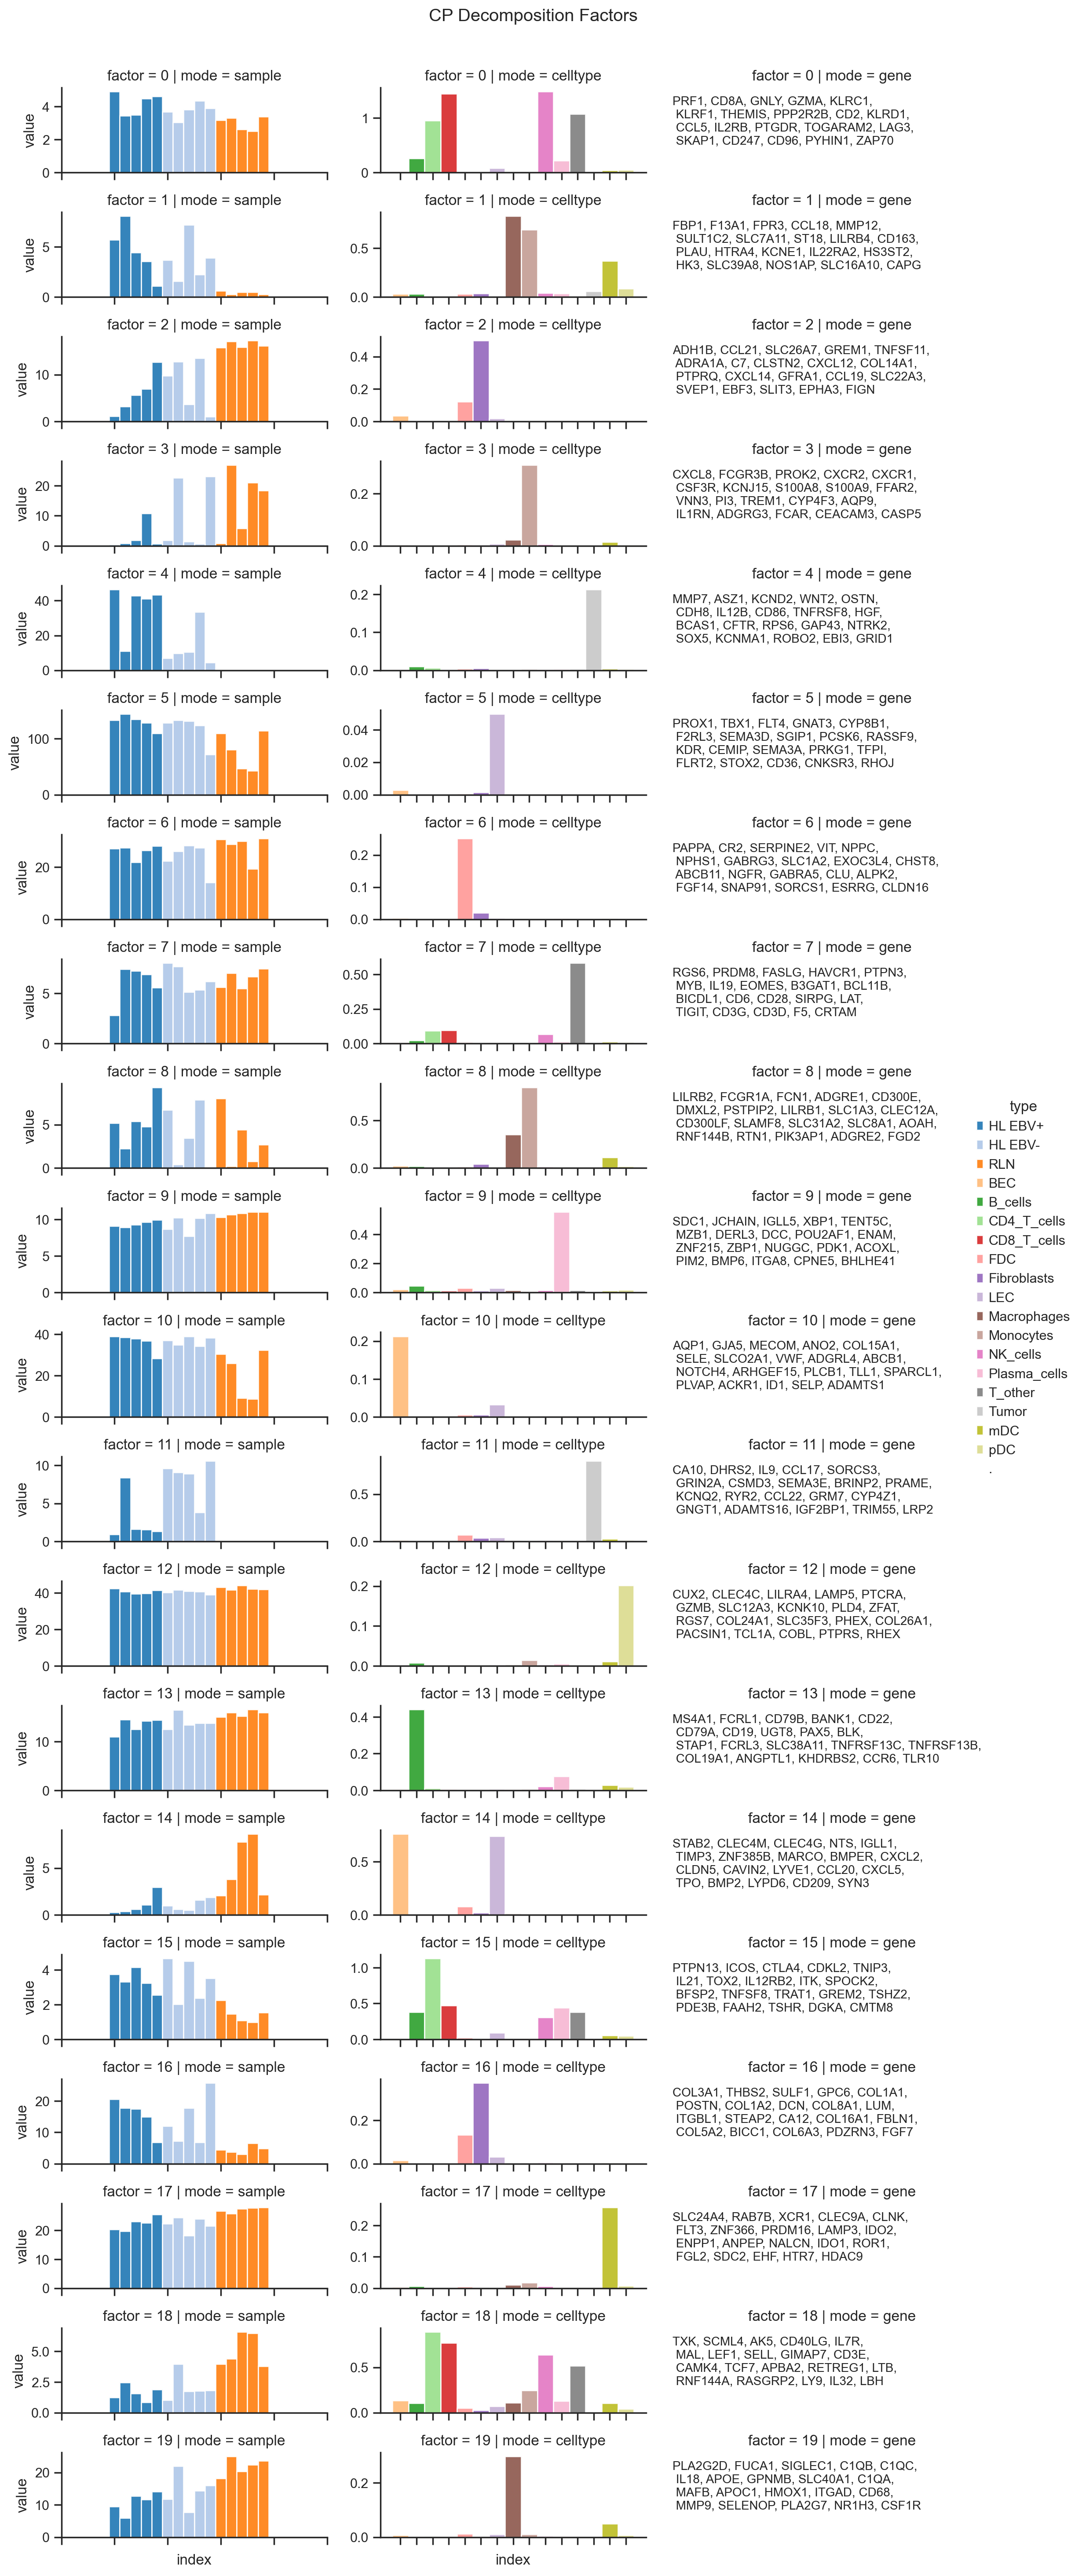

In [11]:
sns.set_theme(style="ticks", rc={"axes.facecolor": (0, 0, 0, 0)}, font_scale=1)
fig = reconstructed_all.plot_components(
    rank=20, restart_index=0, entropy = 2, eps = 0.5, threshold = 0.8, 
    sort_by = 'other', plot_erichment_terms=False, normalize_gene_factors=True, top=0.95
)
fig

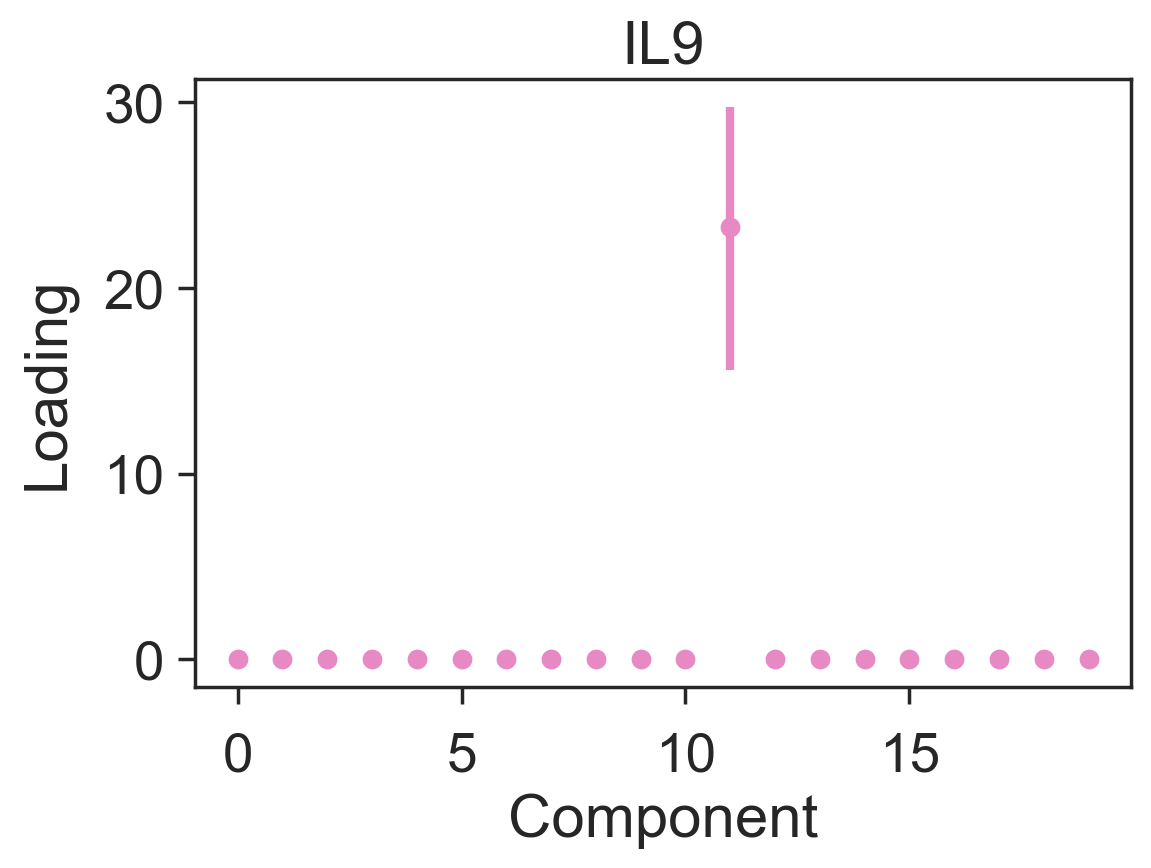

In [12]:
sns.set_theme(style="ticks", rc={"axes.facecolor": (0, 0, 0, 0)}, font_scale=1.8)
fig = reconstructed_all.plot_gene_across_components(rank=20, restart_index=0, gene='IL9')

***
***
## Correlation between factors and sample features
***
***

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

HL EBV+ vs. HL EBV-: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=1.300e+01
HL EBV- vs. RLN: Mann-Whitney-Wilcoxon test two-sided, P_val:7.937e-03 U_stat=0.000e+00
HL EBV+ vs. RLN: Mann-Whitney-Wilcoxon test two-sided, P_val:7.937e-03 U_stat=0.000e+00


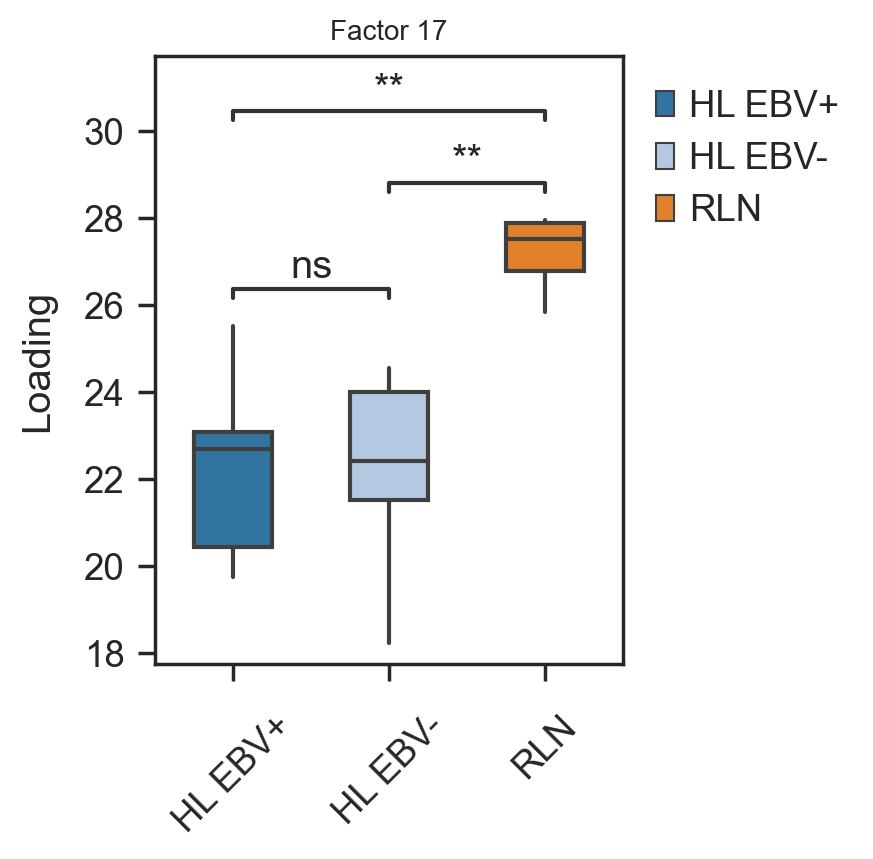

In [13]:
sns.set_theme(style="ticks", rc={"axes.facecolor": (0, 0, 0, 0)}, font_scale=1.2)
fig = reconstructed_all.sample_factor_correlation(rank=20, restart_index = 0, x = "sample_type", y = 17, 
                                order = ["HL EBV+", "HL EBV-", "RLN"], 
                                pairs = [("HL EBV+", "HL EBV-"), ("HL EBV+", "RLN"), ("HL EBV-", "RLN")])
plt.ylabel("Loading",labelpad=10)
plt.tick_params(axis='x', which='major', pad=10)
plt.tick_params(axis='y', which='major', pad=5)
plt.xticks(rotation=45)
plt.show()

***
***
## Detailed factor loading plot
***
***

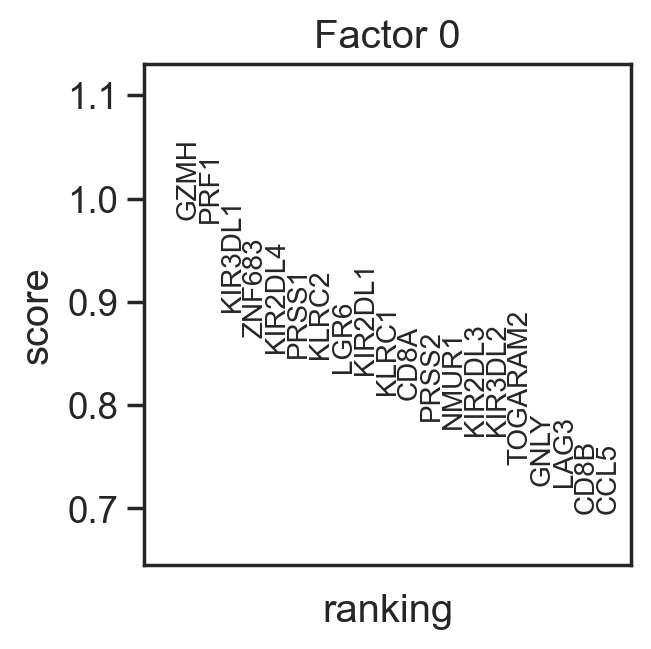

In [14]:
fig = reconstructed_all.gene_factor_elbow_plots(rank=20, restart_index=0, factor_index=0, num_genes=20, normalize=True, fontsize=10)

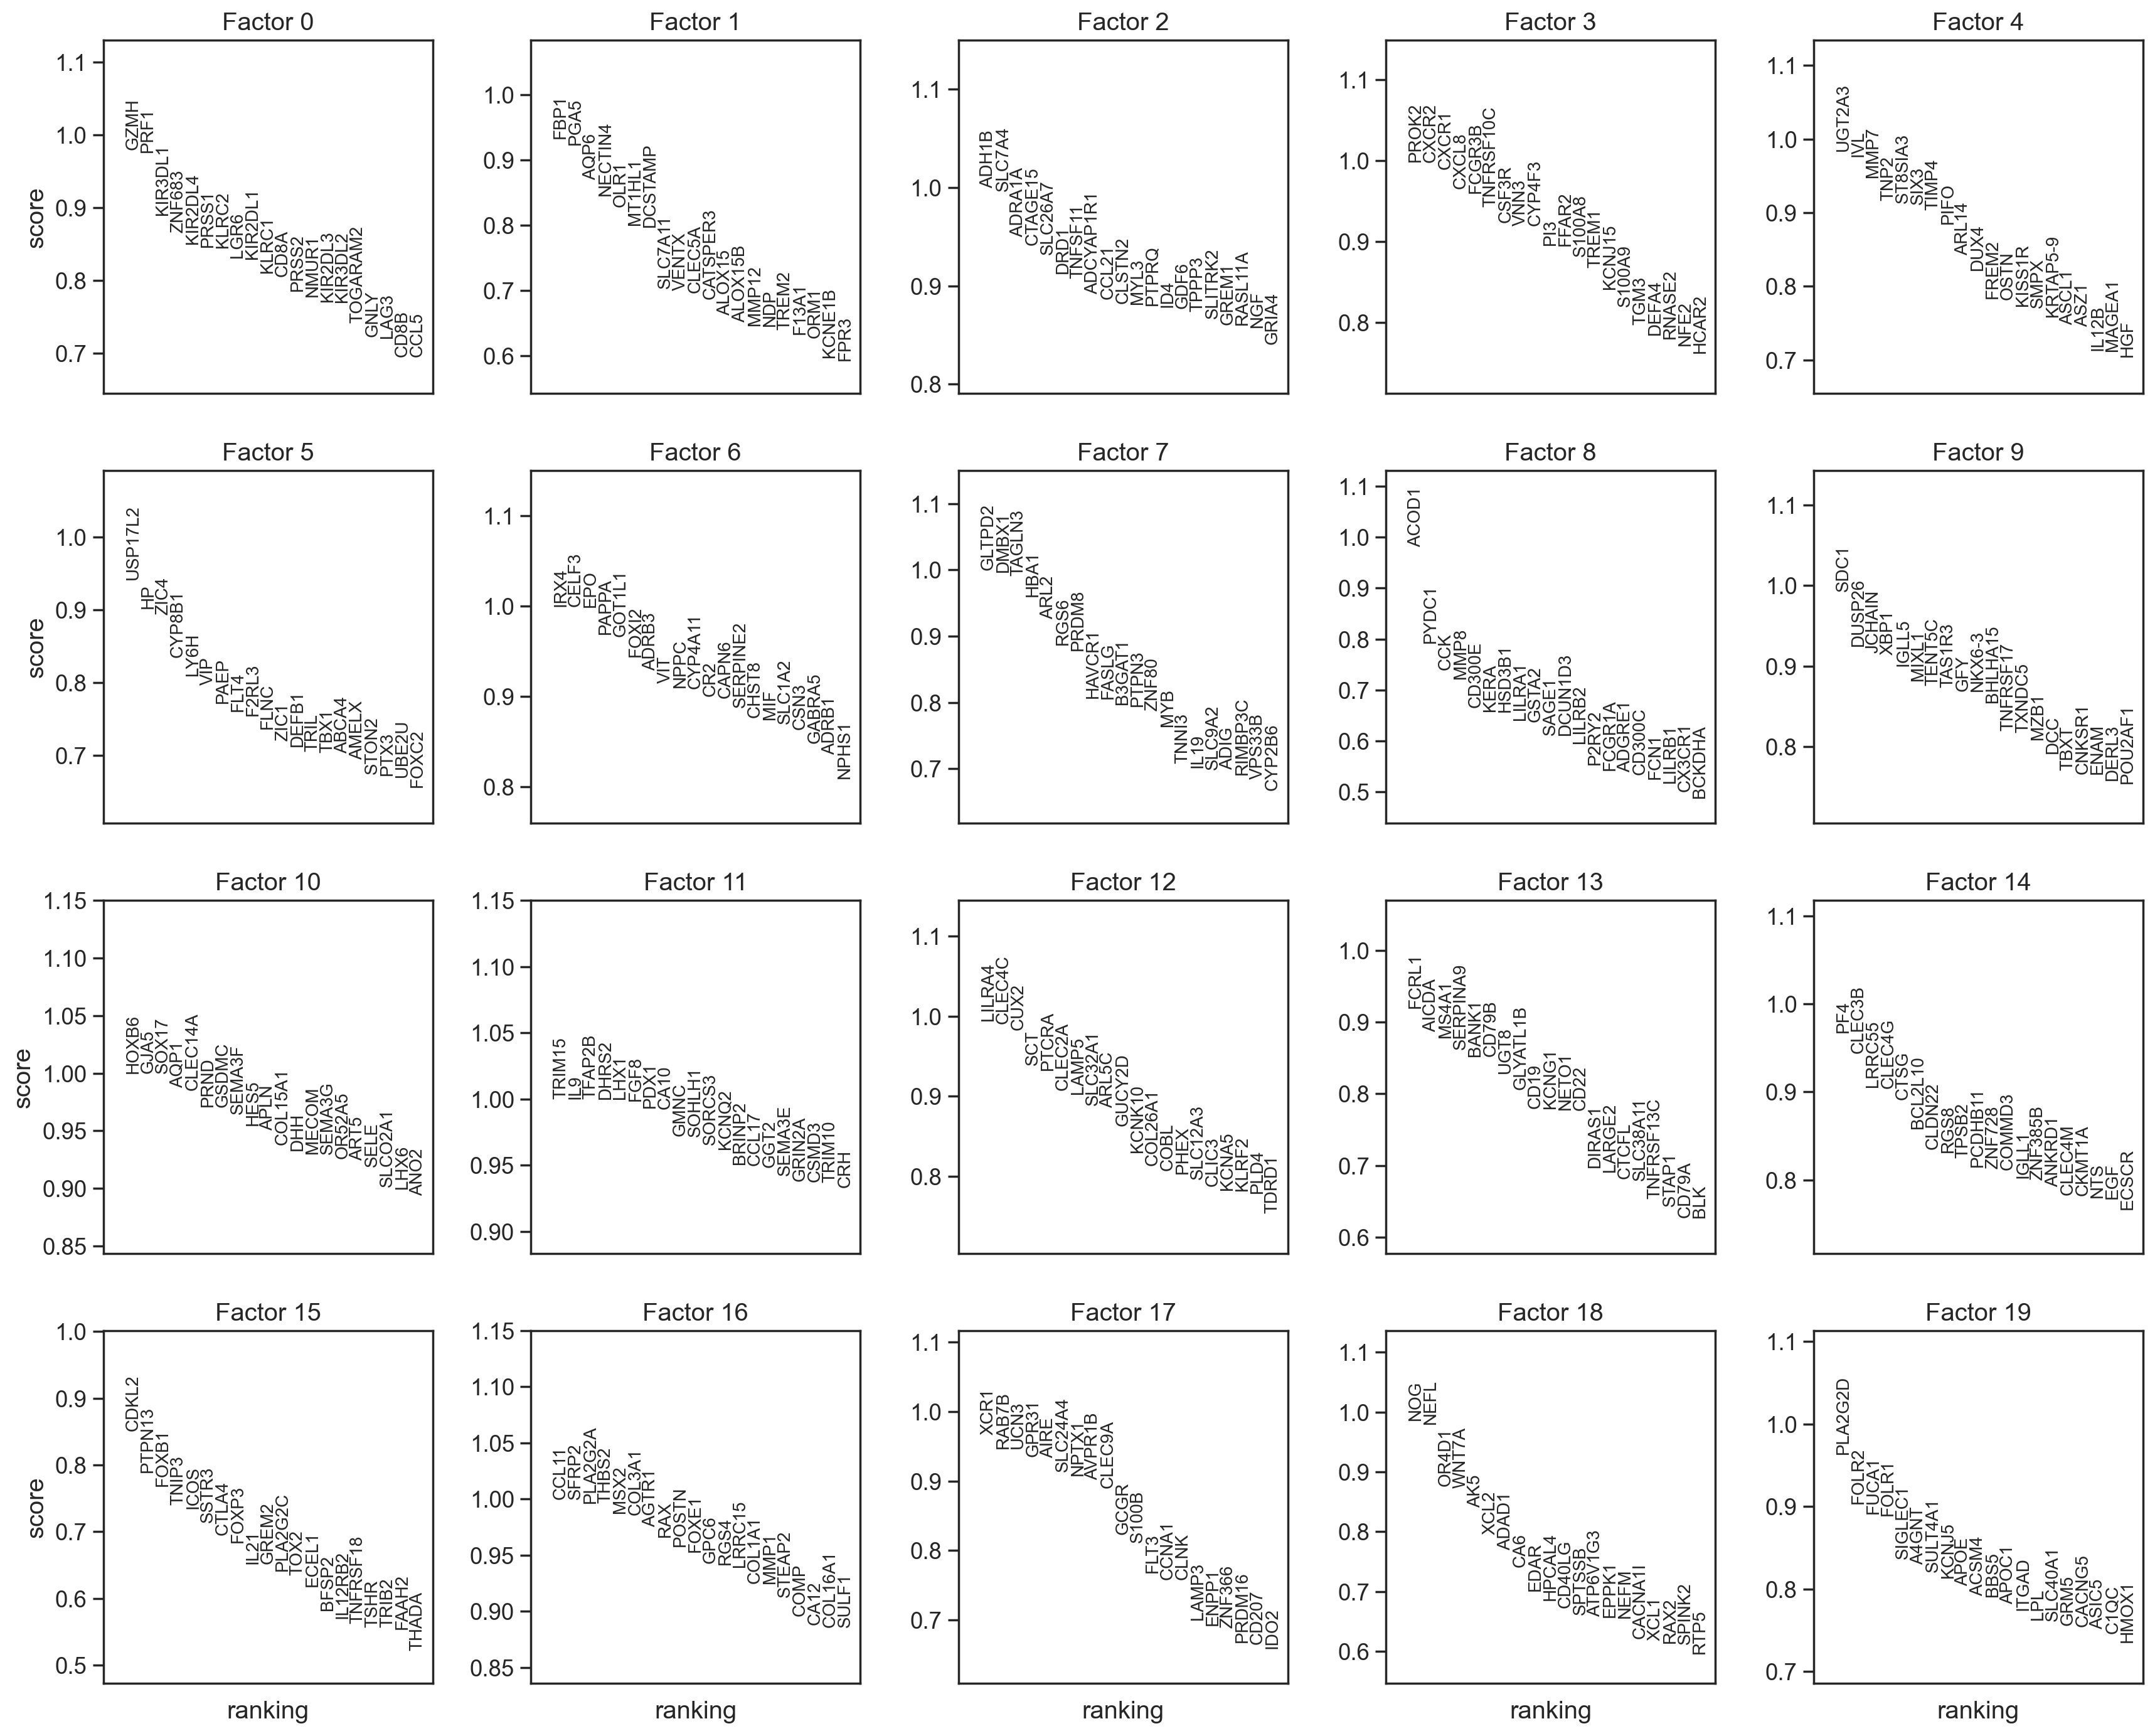

In [15]:
fig = reconstructed_all.gene_factor_elbow_plots(rank=20, restart_index=0, num_genes=20, normalize=True, fontsize=10)

***
***
## Detailed Enrichment analysis
***
***